# Lending Club Case Study

## Initial Setup

Import required libraries for Exploratory Data Analysis. 

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

Load the loan dataset

In [2]:
loan_data = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
loan_data.shape

(39717, 111)

In [4]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# Get a preview
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


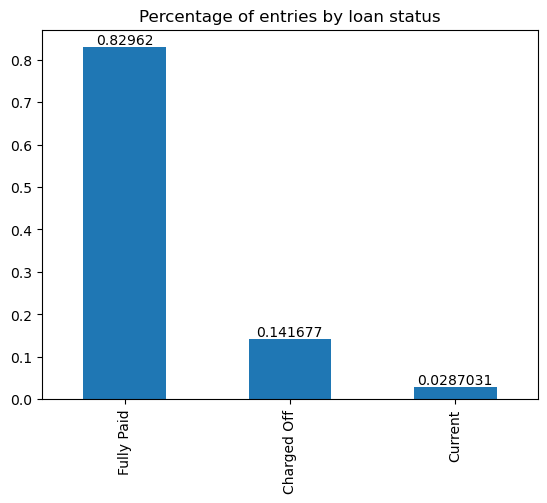

In [6]:
ax = loan_data.loan_status.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])
plt.title("Percentage of entries by loan status")
plt.show()

In [7]:
# Storing all the column names before the drop operation
before_drop = set(loan_data.columns)

In [8]:
# Remove the entries having "Current" loan_status as they are not helpful for analysis. 
loan_data = loan_data[~(loan_data.loan_status == 'Current')]

In [9]:
# Drop columns that have more than 50% of the values missing
loan_data.dropna(axis='columns', thresh=int(0.5 * loan_data.shape[0]), inplace=True)

# Check row & column count
loan_data.shape

(38577, 54)

In [10]:
after_drop = set(loan_data.columns)
dropped_columns = before_drop.difference(after_drop)
dropped_columns

{'acc_open_past_24mths',
 'all_util',
 'annual_inc_joint',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'dti_joint',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_il_6m',
 'open_rv_12m',
 'open_rv_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 '

- 111 - 43 = __68 columns__ are dropped as they did not have any values and hence not useful for analysis.
- 1,140 rows dropped

In [11]:
# Inspect datatype of each column to see if any of the datatypes don't make sense
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

A lot of columns have `object` data type. Let's look at these columns in isolation to better understand if `object` is indeed the right data type for these columns. 

In [12]:
loan_data.select_dtypes('object').head(5)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL


As per the data dictionary, the column definition for `term` is "The number of payments on the loan. Values are in months and can be either `36` or `60`". As it is, the term column is not suitable for analysis as it contains strings. Let's convert it into a integer column. 

In [13]:
# Check if the term column has any empty values
loan_data.term.isna().sum()

0

The term column does not contain any null values. Let's convert the data type now. 

In [14]:
loan_data.term = loan_data.term.apply(lambda x: int(x.strip().split(" ")[0]))

In [15]:
# Verify that the data type is correct
loan_data.term.head(5)

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [16]:
loan_data.select_dtypes('object')

,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,...,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,n,...,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,8.07%,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,...,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,7.43%,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,...,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


It can also be noticed that the `int_rate` column which denotes the interest rate of the loan is a string. Let's change that to a float. 

In [17]:
# Let's verify if there are any empty values for interest rate
loan_data.int_rate.isna().sum()

0

In [18]:
# Since there aren't any empty values, let's proceed with converting the data type
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [19]:
# Verify that the data type is correct
loan_data.int_rate.head(5)

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [20]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,...,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


In [21]:
issue_d = pd.to_datetime(loan_data.issue_d, format="%b-%y").dt
loan_data['issue_month'] = issue_d.month
loan_data['issue_year'] = issue_d.year

In [22]:
loan_data.loc[:, ['issue_month', 'issue_year']]

,issue_month,issue_year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
5,12,2011
...,...,...
39712,7,2007
39713,7,2007
39714,7,2007
39715,7,2007


In [23]:
# check if loan_status has any empty values
loan_data.loan_status.isna().sum()

0

Since pymnt_plan has only one value, it's not required for analysis and hence can be dropped

In [24]:
# url is not helpful with analysis, hence dropping it
loan_data.drop('url', axis='columns', inplace=True)

In [25]:
# desc isn't helpful, dropping the column
loan_data.drop('desc', axis='columns', inplace=True)

In [26]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,n,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


In [27]:
# find all columns that have only one value and remove them
column_unique = loan_data.nunique()
c1 = column_unique[column_unique.values == 1]
print(c1.index)

loan_data.drop(columns = list(c1.index), inplace=True)

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')


In [28]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,May-16
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,Feb-96,21%,Jan-15,Apr-16
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,Jan-15,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,Jul-10,Jun-10
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,Jul-10,Jul-10
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,Apr-08,Jun-07
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,Nov-88,0.70%,Jan-08,Jun-07


In [29]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,12,2011


In [30]:
# checking if the member_id is unique
loan_data.member_id.is_unique

True

In [31]:
float_columns = list(loan_data.select_dtypes('float64').columns)
print(float_columns)

['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


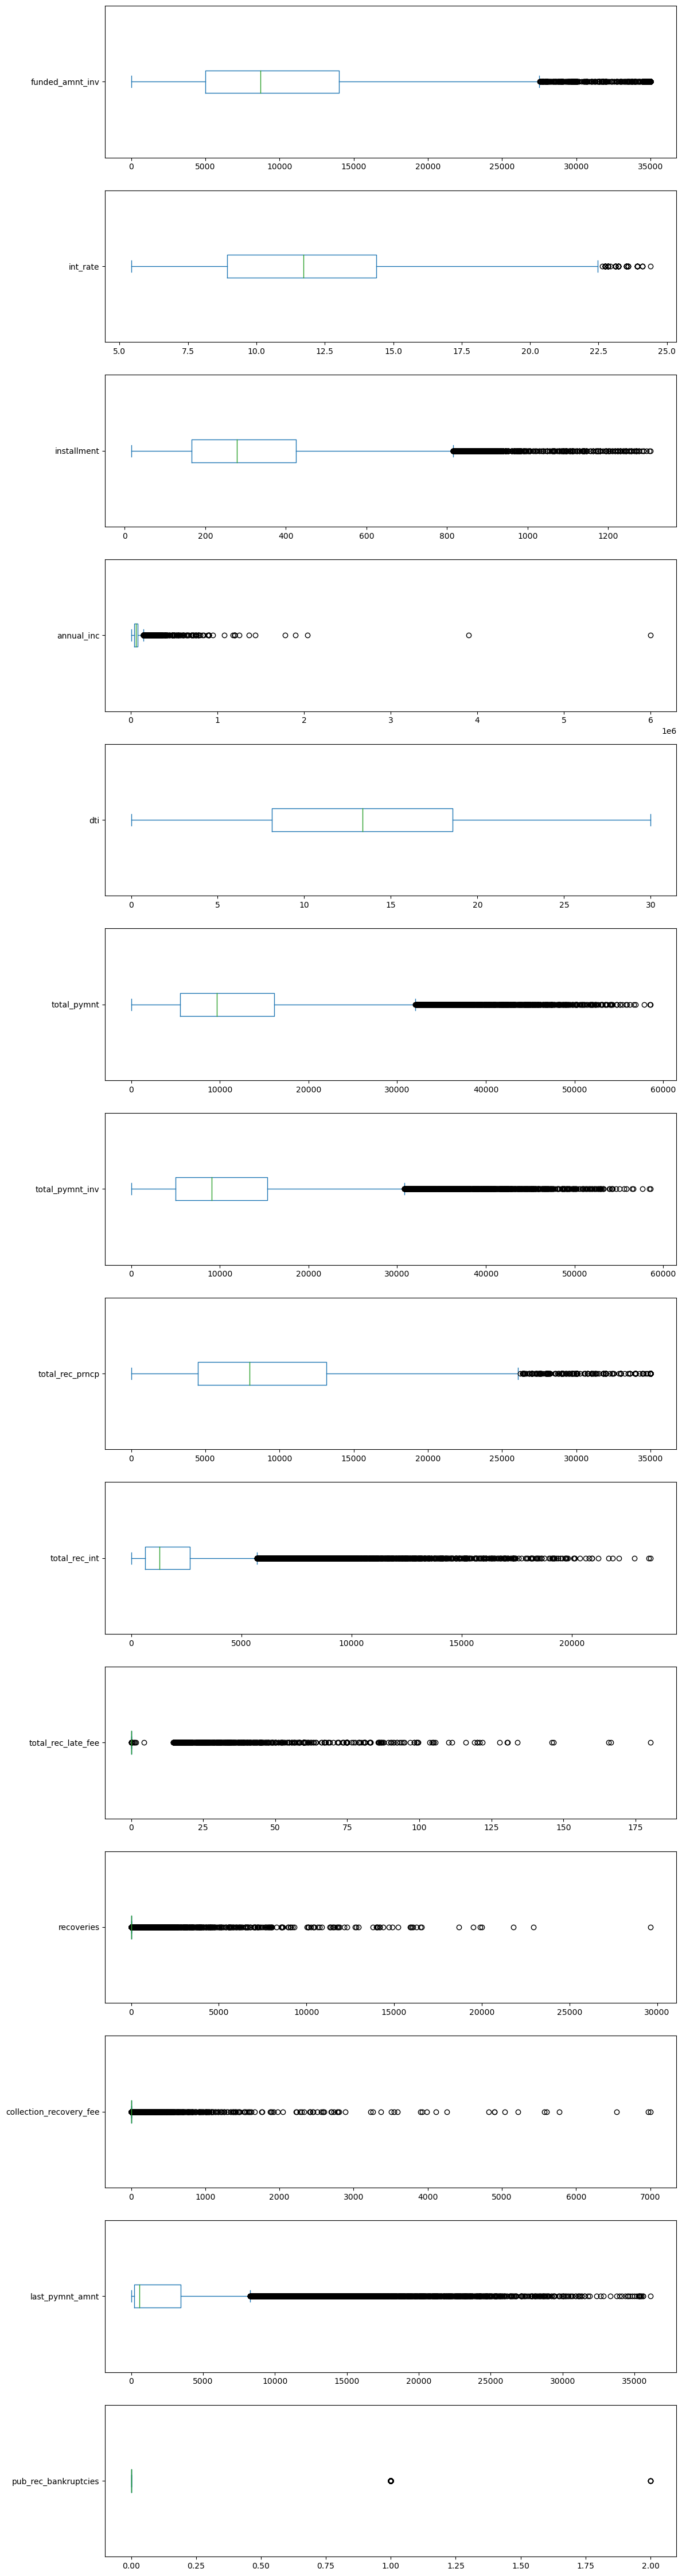

In [32]:
fig, ax = plt.subplots(nrows=len(float_columns), ncols=1, figsize=(12, 45))
for i in range(0, len(float_columns)):
    loan_data[float_columns[i]].plot.box(ax=ax[i], vert=False)
plt.tight_layout()
plt.show()

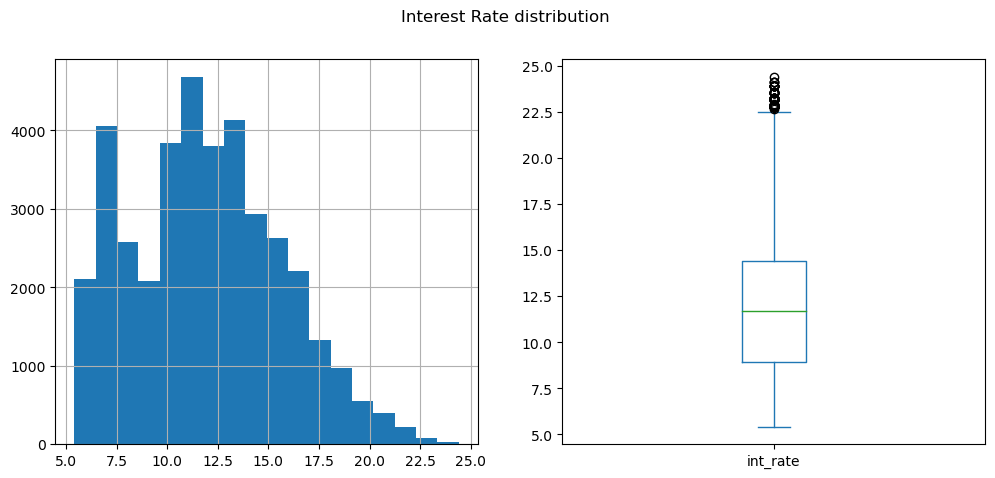

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
loan_data.int_rate.hist(bins=18, ax=ax[0])
loan_data.int_rate.plot.box(ax=ax[1])
plt.suptitle('Interest Rate distribution')
plt.show()

<AxesSubplot:ylabel='Frequency'>

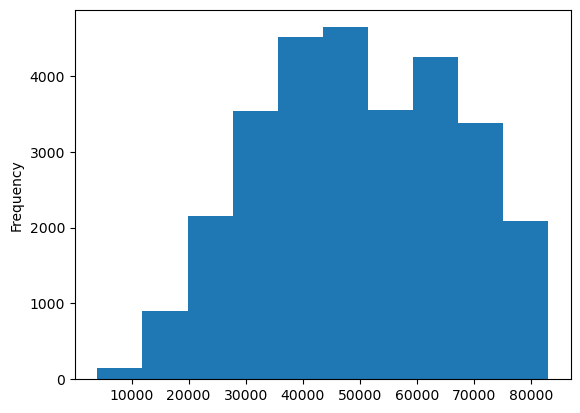

In [34]:
loan_data[loan_data.annual_inc <= 83000].annual_inc.plot.hist()

<AxesSubplot:ylabel='Frequency'>

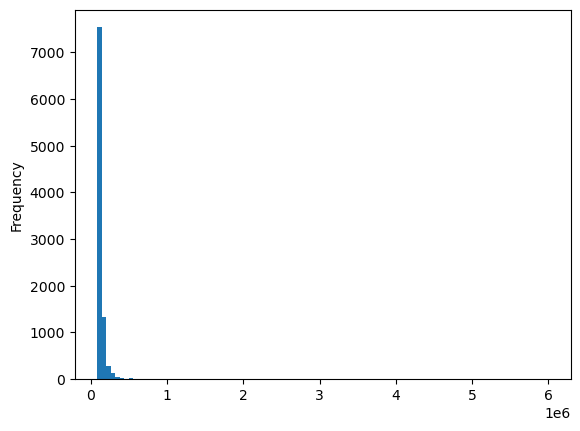

In [35]:
loan_data[loan_data.annual_inc > 83000].annual_inc.plot.hist(bins=100)

In [36]:
np.percentile(loan_data.annual_inc, [0.25, 0.75])

array([10000. , 13277.8])

In [37]:
loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [38]:
(loan_data.isna().sum() / loan_data.shape[0]) * 100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

In [39]:
# The title and emp_title are not helpful for analysis 
loan_data.drop(['title', 'emp_title'], axis='columns', inplace=True)

In [40]:
loan_data.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [41]:
# dropping rows that contain missing values
loan_data.dropna(axis='index', how='any', inplace=True)

In [42]:
# verify that there are no missing values
loan_data.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

In [43]:
data = loan_data.annual_inc.value_counts().reset_index()
data

,index,annual_inc
0,60000.00,1408
1,50000.00,992
2,40000.00,824
3,45000.00,771
4,75000.00,760
...,...,...
4928,82116.00,1
4929,242400.00,1
4930,133300.00,1
4931,125000.32,1


In [44]:
data.index

RangeIndex(start=0, stop=4933, step=1)

In [45]:
list(data)

['index', 'annual_inc']

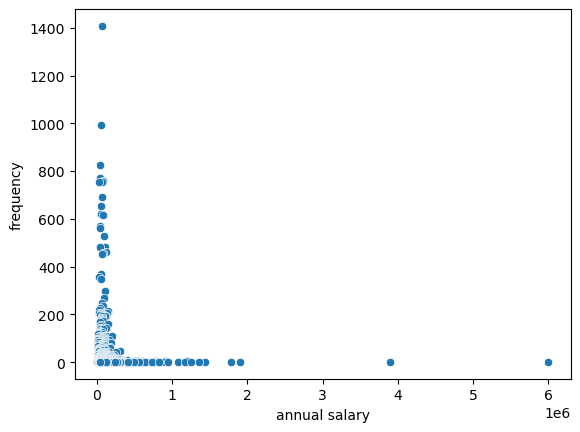

In [46]:
fig, ax = plt.subplots()
# plt.xscale('log')
# plt.yscale('log')
sns.scatterplot(data=data, x='index', y='annual_inc', ax=ax)
plt.xlabel('annual salary')
plt.ylabel('frequency')
plt.show()

In [47]:
loan_data.select_dtypes('object')

,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,Nov-01,98.50%,Jun-14,May-16
3,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96,21%,Jan-15,Apr-16
5,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,Nov-04,28.30%,Jan-15,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,C,C1,1 year,RENT,Not Verified,Nov-07,Fully Paid,debt_consolidation,226xx,VA,Mar-00,68.70%,Aug-08,Aug-08
39573,C,C2,3 years,MORTGAGE,Not Verified,Nov-07,Fully Paid,debt_consolidation,853xx,AZ,Feb-89,79%,May-10,Apr-16
39623,D,D3,8 years,MORTGAGE,Not Verified,Oct-07,Charged Off,debt_consolidation,207xx,MD,Aug-97,62.90%,May-08,May-16
39666,C,C4,2 years,MORTGAGE,Not Verified,Aug-07,Charged Off,debt_consolidation,201xx,VA,Nov-92,34.30%,Oct-09,Mar-10


In [48]:
def parse_emp_length(value):
    tokens = value.split(' ')
    numeric_value = tokens[1] if value[0] == '<' else tokens[0]
    if numeric_value[-1] == '+':
        numeric_value = numeric_value[:-1]
    return int(numeric_value)

In [49]:
# convert emp_length to int type
loan_data.emp_length = loan_data.emp_length.apply(parse_emp_length)

In [50]:
loan_data.emp_length.describe()

count    36737.000000
mean         5.082995
std          3.399271
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Columns that can be used for outlier removal
loan amount
income 
grade *
int_rate
loan term *
funded_amnt
funded_amnt_inv

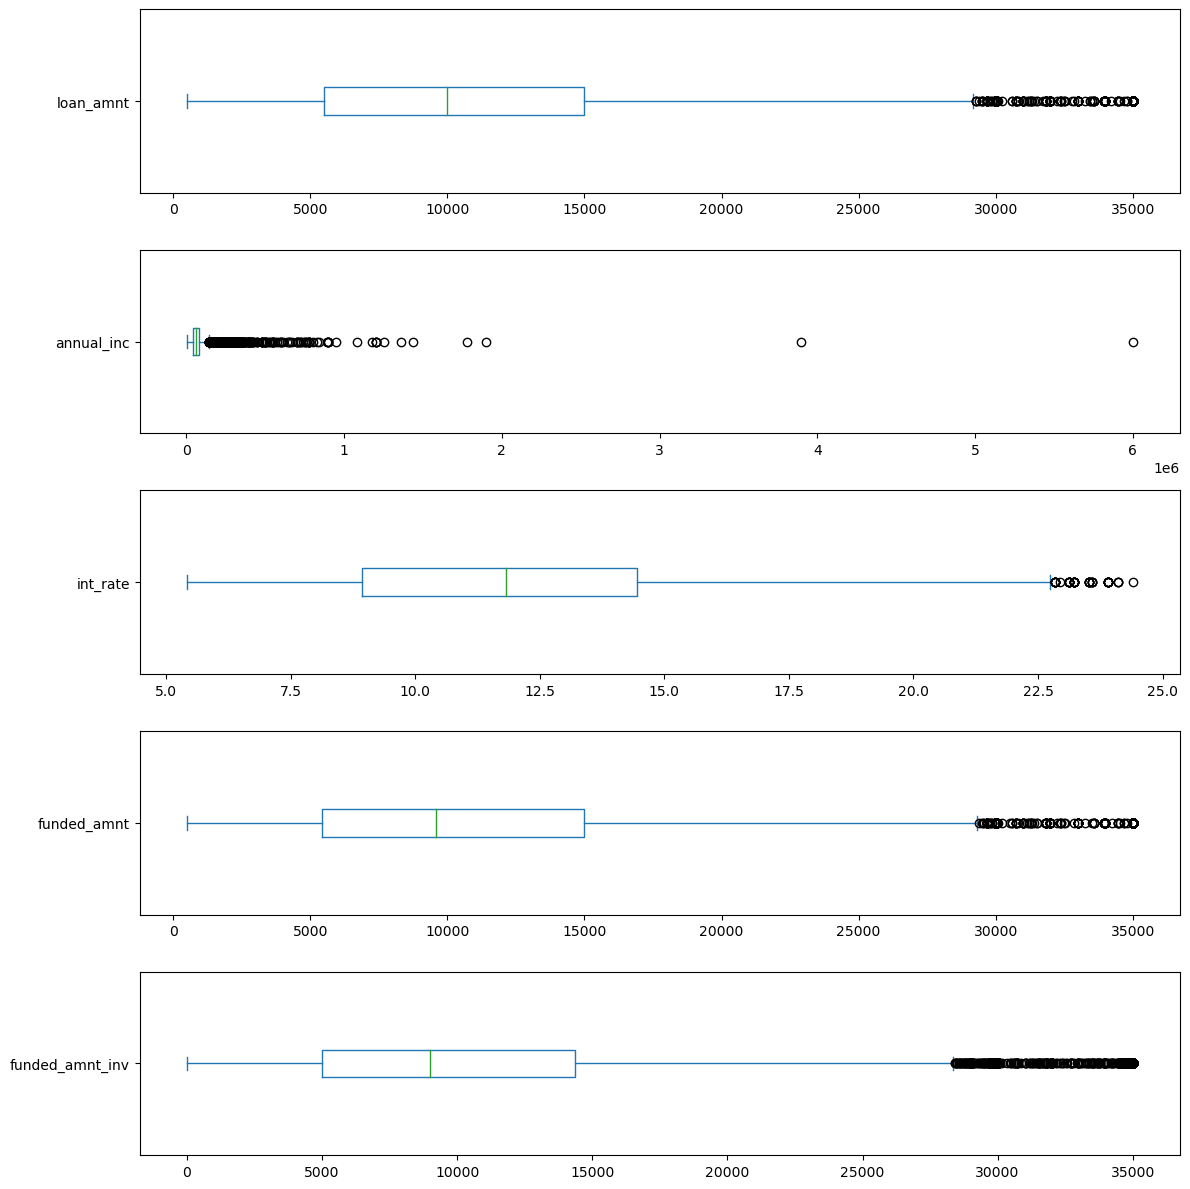

In [51]:
columns = ['loan_amnt', 'annual_inc', 'int_rate', 'funded_amnt', 'funded_amnt_inv']
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 12))
for i in range(0, len(columns)):
    loan_data[columns[i]].plot.box(ax=ax[i], vert=False)
plt.tight_layout()
plt.show()

In [52]:
def get_outlier_bounds(series):
    quantiles = np.quantile(series, [0.25, 0.75])
    IQR = quantiles[1] - quantiles[0]
    bounds = (quantiles[0] - 1.5 * IQR, quantiles[1] + 1.5 * IQR)
    return bounds

In [53]:
def remove_outliers(dataframe, column):
    bounds = get_outlier_bounds(dataframe[column])
    dataframe = dataframe[(dataframe[column] >= bounds[0]) & (dataframe[column] <= bounds[1])]

In [60]:
columns_for_outlier_removal = ['loan_amnt', 'annual_inc', 'int_rate']
for column in columns_for_outlier_removal:
    remove_outliers(loan_data, column)

# TODO: Refactor to make this generic 
bounds = get_outlier_bounds(loan_data.loan_amnt)
print(bounds)
loan_data = loan_data[(loan_data.loan_amnt >= bounds[0]) & (loan_data.loan_amnt <= bounds[1])]

bounds = get_outlier_bounds(loan_data.annual_inc)
print(bounds)
loan_data = loan_data[(loan_data.annual_inc >= bounds[0]) & (loan_data.annual_inc <= bounds[1])]

bounds = get_outlier_bounds(loan_data.int_rate)
print(bounds)
loan_data = loan_data[(loan_data.int_rate >= bounds[0]) & (loan_data.int_rate <= bounds[1])]

(-8750.0, 29250.0)
(-18756.0, 139260.0)
(0.8450000000000006, 22.325)


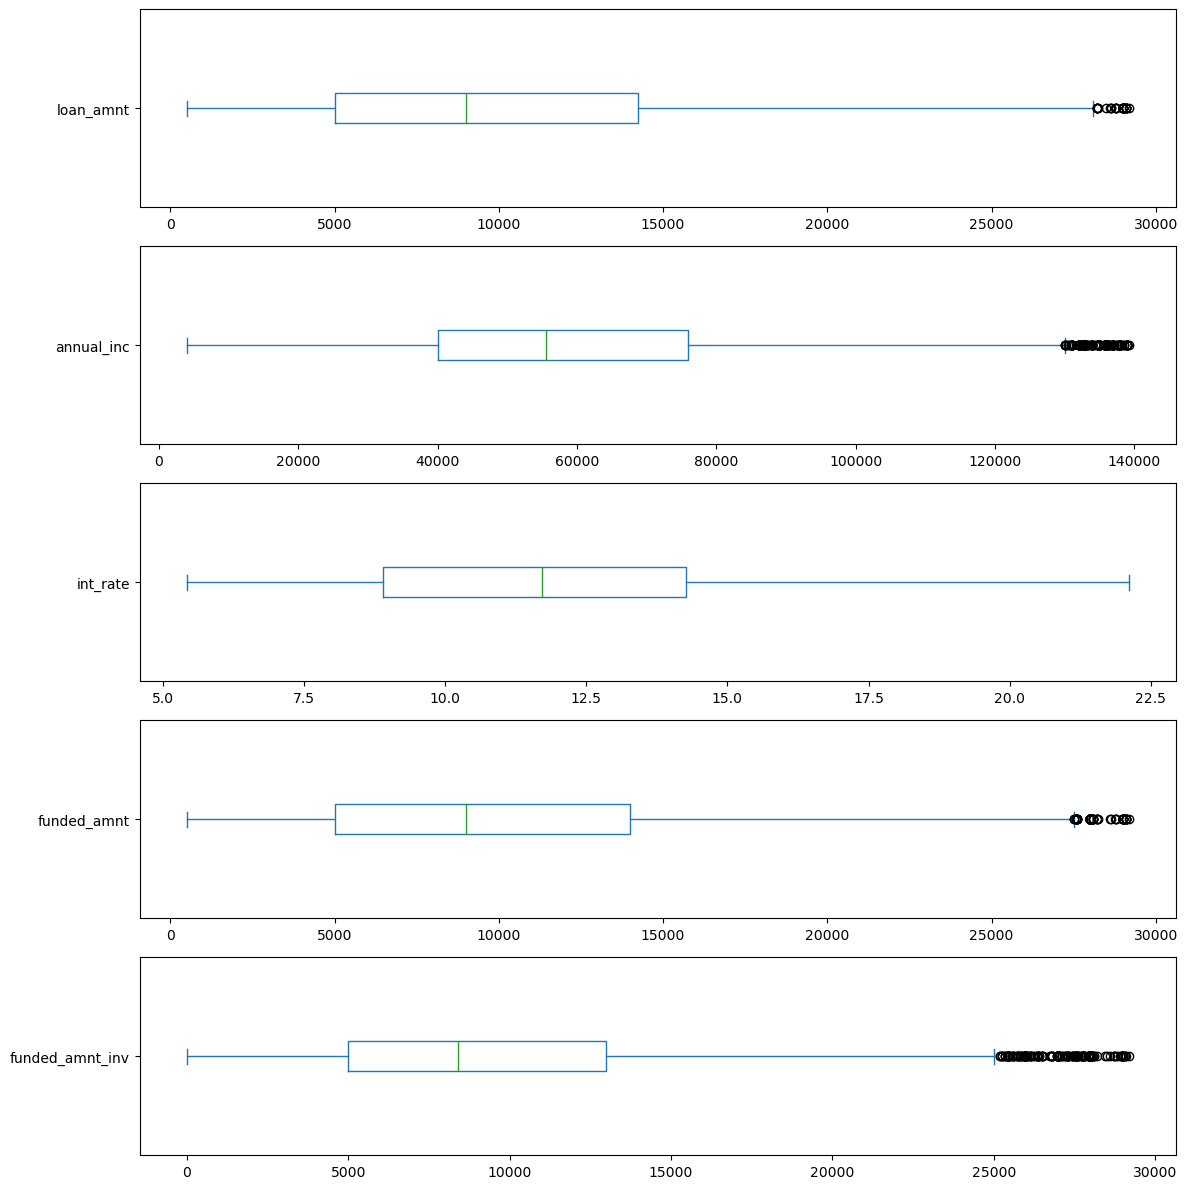

In [62]:
columns = ['loan_amnt', 'annual_inc', 'int_rate', 'funded_amnt', 'funded_amnt_inv']
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 12))
for i in range(0, len(columns)):
    loan_data[columns[i]].plot.box(ax=ax[i], vert=False)
plt.tight_layout()
plt.show()

In [56]:
# TODO: Defaults by Grade / Subgrade
# TODO: Defaults by purpose
# TODO: Correlation between loan_amnt, funded_amnt, grade